In [1]:
import pandas as pd
import numpy as np

In [2]:
df_1 = pd.read_csv('w_2010.csv', sep=',', header=None)
df_2 = pd.read_csv('w_2011.csv', sep=',', header=None)
df_3 = pd.read_csv('w_2012.csv', sep=',', header=None)
df_4 = pd.read_csv('w_2013.csv', sep=',', header=None)
df_5 = pd.read_csv('w_2014.csv', sep=',', header=None)
df_6 = pd.read_csv('w_2015.csv', sep=',', header=None)
df_7 = pd.read_csv('w_2016.csv', sep=',', header=None)
df_8 = pd.read_csv('w_2017.csv', sep=',')
df_9 = pd.read_csv('w_2018.csv', sep=',', header=None)
df_1.columns = ['Station identifier','Date','Observation type','Observation value','Measurement Flag','Quality Flag','Source Flag','Observation Time']
df_2.columns = ['Station identifier','Date','Observation type','Observation value','Measurement Flag','Quality Flag','Source Flag','Observation Time']
df_3.columns = ['Station identifier','Date','Observation type','Observation value','Measurement Flag','Quality Flag','Source Flag','Observation Time']
df_4.columns = ['Station identifier','Date','Observation type','Observation value','Measurement Flag','Quality Flag','Source Flag','Observation Time']
df_5.columns = ['Station identifier','Date','Observation type','Observation value','Measurement Flag','Quality Flag','Source Flag','Observation Time']
df_6.columns = ['Station identifier','Date','Observation type','Observation value','Measurement Flag','Quality Flag','Source Flag','Observation Time']
df_7.columns = ['Station identifier','Date','Observation type','Observation value','Measurement Flag','Quality Flag','Source Flag','Observation Time']
df_8 = df_8.drop('Unnamed: 0', axis=1)
df_9.columns = ['Station identifier','Date','Observation type','Observation value','Measurement Flag','Quality Flag','Source Flag','Observation Time']

In [11]:
df_9.head()

,Station identifier,Date,Observation type,Observation value,Measurement Flag,Quality Flag,Source Flag,Observation Time
0,US1ILMG0006,20180101,PRCP,0,NaN,NaN,N,NaN
1,US1ILMG0006,20180101,SNOW,0,NaN,NaN,N,NaN
2,CA1MB000296,20180101,PRCP,0,NaN,NaN,N,NaN
3,US1ILCP0081,20180101,PRCP,0,NaN,NaN,N,NaN
4,US1ILCP0081,20180101,SNOW,0,NaN,NaN,N,NaN


In [12]:
frames = [df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9]

In [13]:
df = pd.concat(frames, sort=False)

In [14]:
station = pd.read_csv('ghcnd-stations.csv', sep=';', header=None)
station.columns = ['Station identifier', 'State']
station.head()

,Station identifier,State
0,Station,State
1,AQC00914000,AS
2,AQC00914005,AS
3,AQC00914021,AS
4,AQC00914060,AS


In [15]:
#Merge the two datasets

weather = pd.merge(df, station, on='Station identifier')

In [16]:
weather.head()

,Station identifier,Date,Observation type,Observation value,Measurement Flag,Quality Flag,Source Flag,Observation Time,State
0,US1ILMG0005,20100101,SNWD,51,NaN,NaN,N,NaN,IL
1,US1ILMG0005,20100101,DAPR,2,NaN,NaN,N,NaN,IL
2,US1ILMG0005,20100101,MDPR,15,NaN,NaN,N,NaN,IL
3,US1ILMG0005,20100102,PRCP,0,NaN,NaN,N,NaN,IL
4,US1ILMG0005,20100102,SNOW,0,NaN,NaN,N,NaN,IL


In [80]:
#Minesota = MN
#Iowa = IA
#Illinois = IL
#Indiana = IN
#Michigan = MI
#Wisconsin = WI

#We need to filter on these States in order to get the right data, these are the staes with significant Corn production

In [17]:
weather= weather[weather['State'].isin(['MN','IA', 'IL','IN','MI','WI'])]

In [18]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29325663 entries, 0 to 245044738
Data columns (total 9 columns):
Station identifier    object
Date                  int64
Observation type      object
Observation value     int64
Measurement Flag      object
Quality Flag          object
Source Flag           object
Observation Time      float64
State                 object
dtypes: float64(1), int64(2), object(6)
memory usage: 2.2+ GB


In [19]:
weather.drop(['Observation Time', 'Source Flag','Measurement Flag','Quality Flag'], axis=1, inplace=True)
weather.head()

,Station identifier,Date,Observation type,Observation value,State
0,US1ILMG0005,20100101,SNWD,51,IL
1,US1ILMG0005,20100101,DAPR,2,IL
2,US1ILMG0005,20100101,MDPR,15,IL
3,US1ILMG0005,20100102,PRCP,0,IL
4,US1ILMG0005,20100102,SNOW,0,IL


In [20]:
weather['Observation type'].unique()

array(['SNWD', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'WESF', 'WESD', 'TMAX',
       'TMIN', 'TOBS', 'WT01', 'WT03', 'WT05', 'WT04', 'WT06', 'WT11',
       'TAVG', 'AWND', 'PGTM', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT02',
       'WT08', 'WT09', 'PSUN', 'TSUN', 'WSFG', 'FMTM', 'WT13', 'WT16',
       'WT18', 'WT07', 'WT22', 'WT19', 'WT17', 'SN32', 'SN52', 'SX32',
       'SX52', 'MDSF', 'WT14', 'WT15', 'WT10', 'WT21', 'EVAP', 'MNPN',
       'MXPN', 'WDMV', 'DASF', 'SN31', 'SN33', 'SX31', 'SX33', 'WDFG',
       'SN53', 'SX53', 'SX36', 'THIC', 'SN12', 'SX12', 'SN35', 'SN36',
       'SN51', 'SN55', 'SN56', 'SX35', 'SX51', 'SX55', 'SX56', 'DAEV',
       'MDEV', 'SN34', 'SX34'], dtype=object)

In [94]:
#We are going to use TMAX, TMIN, PRCP, SNOW only and now We need to make them as a column. for better readability

In [21]:
pivot = pd.pivot_table(weather, values='Observation value', index=['Date',
                                                                    'Station identifier',], columns='Observation type')
pivot = pivot.filter(['TMAX','TMIN','PRCP','SNOW'])
pivot = pivot.fillna(0)
pivot.head()

Observation type             TMAX  TMIN  PRCP  SNOW
Date     Station identifier                        
20100101 US1IAAP0001          0.0   0.0   0.0   0.0
         US1IABC0002          0.0   0.0   0.0   0.0
         US1IABH0006          0.0   0.0   0.0   0.0
         US1IABH0007          0.0   0.0   0.0   0.0
         US1IABH0008          0.0   0.0   0.0   0.0

In [22]:
#Now we need to aggregate the data based on Dates, (i.e. one data one line)
# one more thing to to => Make it a date format!
final_data = pivot.groupby(level=0).mean()
final_data.index = pd.to_datetime(final_data.index, format='%Y%m%d', errors='ignore')
final_data.head()

Observation type,TMAX,TMIN,PRCP,SNOW
Date,,,,
2010-01-01,-31.046402,-74.829545,3.594223,4.698390
2010-01-02,-52.175943,-101.472170,3.552830,7.444340
2010-01-03,-57.468414,-103.546093,2.228358,5.344408
2010-01-04,-46.521938,-88.392139,2.521024,5.994973
2010-01-05,-40.622883,-76.595881,2.895195,4.625172


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

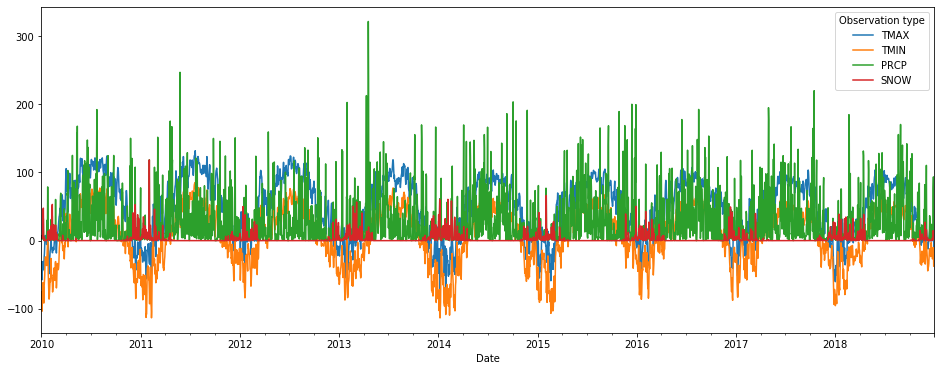

In [24]:
#Plot out the data to see if it makes sense
final_data.plot(figsize=(16,6))

In [154]:
#Alright, so looks like snow data is reasonable, we can only see data from Dec to March
#TMAX and TMIN data looks ok too, over the summer, it's warmer, during winter time is coolder
#PRCP looks okay, lots of rain over spring and fall, as expected

In [25]:
final_data.to_csv('weather.csv')